In [1]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
train_csv = pd.read_csv(filepath_or_buffer="/Users/Golnoush/Desktop/Natural_Language_Processing/key_detection_on_website/data/raw/train.csv")
print("Training set shape", train_csv.shape)
train_csv.head(10)


Training set shape (100, 3)


,url,doc_id,label
0,http://elbe-elster-klinikum.de/fachbereiche/ch...,1,1
1,http://klinikum-bayreuth.de/einrichtungen/zent...,3,3
2,http://klinikum-braunschweig.de/info.php/?id_o...,4,1
3,http://klinikum-braunschweig.de/info.php/?id_o...,5,1
4,http://klinikum-braunschweig.de/zuweiser/tumor...,6,3
5,http://krebszentrum.kreiskliniken-reutlingen.d...,8,1
6,http://krebszentrum.kreiskliniken-reutlingen.d...,9,1
7,http://krebszentrum.kreiskliniken-reutlingen.d...,10,1
8,http://krebszentrum.kreiskliniken-reutlingen.d...,11,1
9,http://krebszentrum.kreiskliniken-reutlingen.d...,12,1


In [3]:
test_csv = pd.read_csv(filepath_or_buffer="/Users/Golnoush/Desktop/Natural_Language_Processing/key_detection_on_website/data/raw/test.csv")
print("Test set shape", test_csv.shape)
test_csv.head()


Test set shape (48, 2)


,url,doc_id
0,http://chirurgie-goettingen.de/medizinische-ve...,0
1,http://evkb.de/kliniken-zentren/chirurgie/allg...,2
2,http://krebszentrum.kreiskliniken-reutlingen.d...,7
3,http://marienhospital-buer.de/mhb-av-chirurgie...,15
4,http://marienhospital-buer.de/mhb-av-chirurgie...,16


In [4]:
tumor_keywords = pd.read_csv(filepath_or_buffer="/Users/Golnoush/Desktop/Natural_Language_Processing/key_detection_on_website/data/raw/keyword2tumor_type.csv")
print("Tumor keywords set shape", tumor_keywords.shape)
tumor_keywords.head()


Tumor keywords set shape (126, 2)


,keyword,tumor_type
0,senologische,Brust
1,brustzentrum,Brust
2,breast,Brust
3,thorax,Brust
4,thorakale,Brust


In [5]:
train_csv.groupby(by="label").size()

label
1    32
2    59
3     9
dtype: int64

In [6]:
def read_html(doc_id: int) -> str:
    with open(file=f"/Users/Golnoush/Desktop/Natural_Language_Processing/key_detection_on_website/data/raw/htmls/{doc_id}.html",
              mode="r",
              encoding="latin1") as f:
        html = f.read()
    return html


train_csv["html"] = train_csv["doc_id"].apply(read_html)

In [7]:
train_csv.sample(n=5, random_state=42)

,url,doc_id,label,html
83,http://www.sbk-vs.de/de/medizin/leistungen-und...,125,1,"\n\n<!DOCTYPE HTML>\n<html dir=""ltr"" lang=""de_..."
53,http://www.klinikum-esslingen.de/kliniken-und-...,85,2,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or..."
70,http://www.malteser-kliniken-rhein-ruhr.de/med...,107,2,"<!DOCTYPE html>\n<html lang=""de"">\n<head>\n\n<..."
45,http://www.klilu.de/medizin__pflege/kliniken_u...,73,2,"<!DOCTYPE html>\n<html lang=""de""><head>\n\t<me..."
44,http://www.kk-bochum.de/de/kliniken_zentren_be...,72,1,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T..."


In [8]:
import warnings

from bs4 import BeautifulSoup

warnings.filterwarnings(action="ignore")


def extract_html_text(html):
    bs = BeautifulSoup(markup=html, features="lxml")
    for script in bs(name=["script", "style"]):
        script.decompose()
    return bs.get_text(separator=" ")


train_csv["html_text"] = train_csv["html"].apply(extract_html_text)

In [9]:
train_csv

,url,doc_id,label,html,html_text
0,http://elbe-elster-klinikum.de/fachbereiche/ch...,1,1,<!DOCTYPE html>\n<!-- jsn_reta_pro 1.0.2 -->\n...,\n \n \n \n \n \n Elbe-Elster Klinikum - Chiru...
1,http://klinikum-bayreuth.de/einrichtungen/zent...,3,3,"<!DOCTYPE html>\n<html class=""no-js"" lang=""de""...",\n \n \n \n \n \n \n Onkologisches Zentrum - K...
2,http://klinikum-braunschweig.de/info.php/?id_o...,4,1,"<!doctype html>\n<html lang=""de"">\n<head>\n\t<...",\n \n Zentrum - SozialpÃ¤diatrisches Zentrum -...
3,http://klinikum-braunschweig.de/info.php/?id_o...,5,1,"<!doctype html>\n<html lang=""de"">\n<head>\n\t<...",\n \n Leistung - Spezielle UnterstÃ¼tzung bei ...
4,http://klinikum-braunschweig.de/zuweiser/tumor...,6,3,"<!doctype html>\n<html lang=""de"">\n<head>\n\t<...",\n \n Zuweiser - Tumorkonferenzen - Tumorkonfe...
...,...,...,...,...,...
95,http://www.unicross.uni-freiburg.de/thema/unifm/,140,1,"<!DOCTYPE html>\n<html lang=""de-DE""\nprefix=""o...",\n \n \n \n \n \n \n \n \n \n \n uniFM | uniCR...
96,http://www.uniklinik-duesseldorf.de/patienten-...,141,1,"<!DOCTYPE html>\n<html class=""no-js"" lang=""de""...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...
97,http://www.vivantes.de/fuer-sie-vor-ort/klinik...,144,2,"<!DOCTYPE html>\n\n<html class=""no-js"" lang=""d...",\n \n \n \n \n \n \n \n \n \n \n \n FÃ¼r Ãrzt...
98,http://www.vivantes.de/fuer-sie-vor-ort/klinik...,145,2,"<!DOCTYPE html>\n\n<html class=""no-js"" lang=""d...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n Inne...


In [10]:
from gensim.parsing import preprocessing


def preprocess_html_text(html_text: str) -> str:
    preprocessed_text = preprocessing.strip_non_alphanum(s=html_text)
    preprocessed_text = preprocessing.strip_multiple_whitespaces(s=preprocessed_text)
    preprocessed_text = preprocessing.strip_punctuation(s=preprocessed_text)
    preprocessed_text = preprocessing.strip_numeric(s=preprocessed_text)

    preprocessed_text = preprocessing.stem_text(text=preprocessed_text)
    preprocessed_text = preprocessing.remove_stopwords(s=preprocessed_text)
    return preprocessed_text


train_csv["preprocessed_html_text"] = train_csv["html_text"].apply(preprocess_html_text)

In [11]:
train_csv.sample(n=5, random_state=42)

,url,doc_id,label,html,html_text,preprocessed_html_text
83,http://www.sbk-vs.de/de/medizin/leistungen-und...,125,1,"\n\n<!DOCTYPE HTML>\n<html dir=""ltr"" lang=""de_...",\n \n \n \n \n Prostata-Karzinom-Zentrum - Sch...,prostata karzinom zentrum schwarzwald baar kli...
53,http://www.klinikum-esslingen.de/kliniken-und-...,85,2,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,unser profil gefã ã und thoraxchirurgi kliniku...
70,http://www.malteser-kliniken-rhein-ruhr.de/med...,107,2,"<!DOCTYPE html>\n<html lang=""de"">\n<head>\n\n<...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,maltes kliniken rhein ruhr darmzentrum duisbur...
45,http://www.klilu.de/medizin__pflege/kliniken_u...,73,2,"<!DOCTYPE html>\n<html lang=""de""><head>\n\t<me...",\n \n \n \n Darmzentrum Rheinpfalz » Zentren A...,darmzentrum rheinpfalz zentren z kliniken und ...
44,http://www.kk-bochum.de/de/kliniken_zentren_be...,72,1,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,mund kiefer und plastisch gesichtschirurgi en ...


Exploratory Data Analysis

In [12]:
import plotly.express as px
import plotly.offline as pyo

# set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)

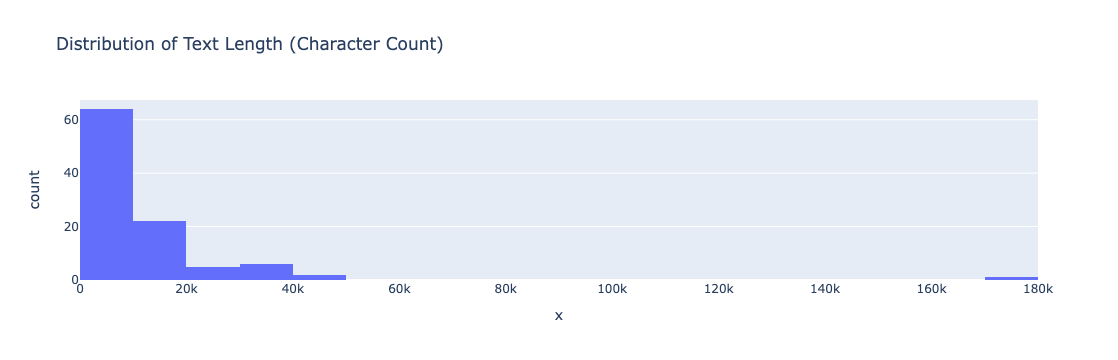

In [13]:
px.histogram(x=train_csv["preprocessed_html_text"].apply(len), title="Distribution of Text Length (Character Count)")

In [ ]:
!pip install numpy pandas matplotlib plotly

There is one document with 170-179K characters. Others are with < 50K character count in total.

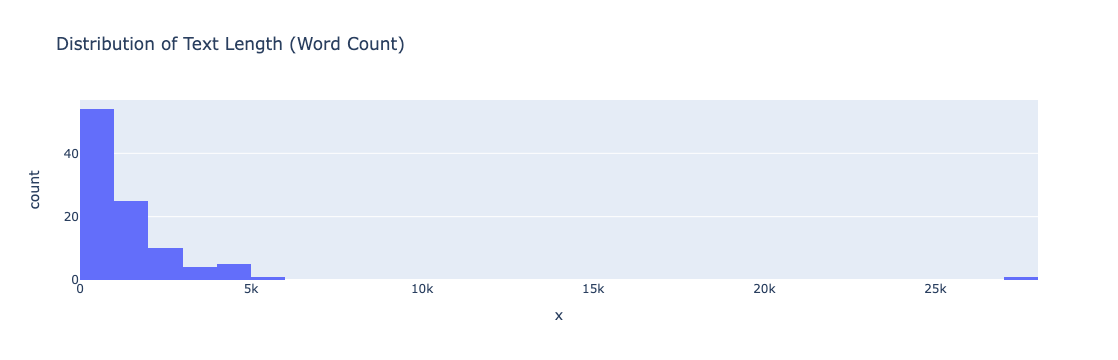

In [15]:
px.histogram(x=train_csv["preprocessed_html_text"].apply(lambda text: text.split(" ")).apply(len),
             title="Distribution of Text Length (Word Count)")

There is one document with 27-28K words. Other documents all have < 6K words in total.

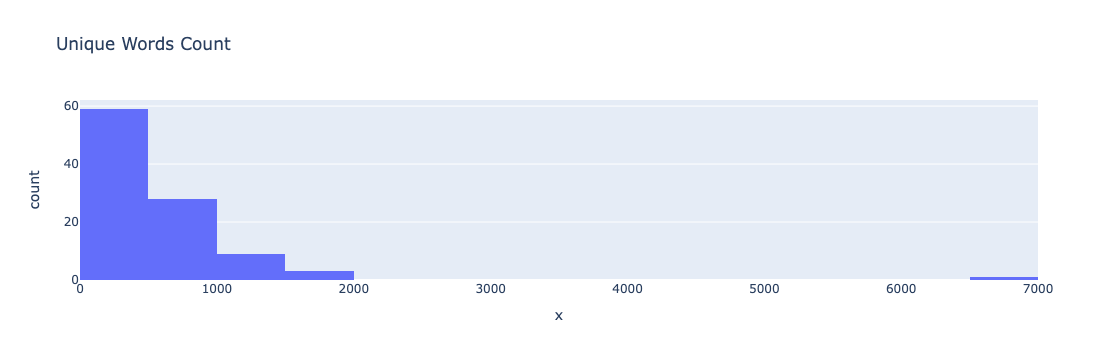

In [16]:
px.histogram(x=train_csv["preprocessed_html_text"].apply(lambda text: set(text.split(" "))).apply(len),
             title="Unique Words Count")

There is one document with 6500-7000 unique words. All others consist of < 2000 unique words.

Modeling
using a model called the siamese network. 
Siamese networks are able to address the class imbalance and small data set sizes.
They are mostly used in few shots learning tasks, like signature verification systems, face recognition, object detection, etc.

In [17]:
import random
import numpy as np
import tensorflow as tf

# set the random seeds
np.random.seed(42)
tf.random.set_seed(seed=42)

2023-09-02 15:27:09.115774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data Generators
Implementing a data generator class for tensor flow keras.

In [18]:
class Pair(tf.keras.utils.Sequence):
    def __init__(self, dataframe: pd.DataFrame, labels: pd.Series, n_batch: int, batch_size: int):
        self.dataframe = dataframe
        self.labels = labels
        self.n_batch = n_batch
        self.batch_size = batch_size
        self.all_classes = set(self.labels)
        self.anchor_groups = {}
        for target_class in self.all_classes:
            self.anchor_groups[target_class] = {
                "positive": self.dataframe[self.labels == target_class],
                "negative": self.dataframe[self.labels != target_class]
            }

    def __len__(self):
        return self.n_batch

    def __getitem__(self, item):
        pairs = []

        for i in range(int(self.batch_size / 2)):
            anchor_class = random.randint(1, 3)
            anchor_group = self.anchor_groups[anchor_class]["positive"]
            not_anchor_group = self.anchor_groups[anchor_class]["negative"]

            anchor = anchor_group.sample(n=1).iloc[0]
            positive = anchor_group.sample(n=1).iloc[0]
            negative = not_anchor_group.sample(n=1).iloc[0]

            pairs.append([anchor, positive, 1])
            pairs.append([anchor, negative, 0])

        random.shuffle(x=pairs)
        pairs = np.array(pairs)

        data_pairs = pairs[:, :2]
        targets = pairs[:, 2]

        return data_pairs, tf.convert_to_tensor(targets, dtype=np.float32)

    def get_support_set(self, sample_size: int = 1):
        support_set = {}
        for target_class in self.all_classes:
            support_set[target_class] = self.anchor_groups[target_class]["positive"].sample(n=sample_size)
        return support_set

Model Definition
Here, we define our model, as a siamese network. The model is a sequence of layers, starting with a TextVectorization layer. This layer accepts natural language (text) as input, and maps it to an integer sequence. At initialization time, we should provide a vocabulary of words for it to be able to map the words at prediction time.

Following the text vectorization layer, implement three Dense layers, with two Dropout layers in between. Lastly, apply a L2 normalization layer to penalize large weights.

In [40]:
class SiameseNetwork(tf.keras.Model):
    def __init__(self, corpora: pd.Series):
        super(SiameseNetwork, self).__init__()
        self.vectorizer_layer: tf.keras.layers.TextVectorization = tf.keras.layers.TextVectorization(
            max_tokens=2000,
            output_mode="int",
            output_sequence_length=512
        )
        self.vectorizer_layer.adapt(corpora.values)
        self.encoder = tf.keras.Sequential(layers=[
            self.vectorizer_layer,
            tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
            tf.keras.layers.Lambda(function=lambda x: tf.math.l2_normalize(x, axis=1))
        ])
        self.encoding_distance = tf.keras.layers.Dot(axes=1)

    def __call__(self, inputs, *args, **kwargs):
        anchors, supports = inputs[:, 0], inputs[:, 1]
        anchors_encoded = self.encoder(anchors)
        supports_encoded = self.encoder(supports)
        return self.encoding_distance((anchors_encoded, supports_encoded))

    def predict_with_support_set(self, entry, support_set: dict):
        scores = {}
        for instance_class, texts in support_set.items():
            class_scores = ([self(np.array([entry, text]).reshape((-1, 2))) for text in texts])
            scores[instance_class] = tf.math.reduce_mean(class_scores)
        return max(scores, key=scores.get)

Below we instantiate a model object and compile it.

In [20]:
model = SiameseNetwork(corpora=train_csv["preprocessed_html_text"])

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='binary_accuracy')

At this point, we have our model, our data, and the data generator. We are ready to commence training.

But, before we do that, let's split the data in train_csv into training and validation sets.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_csv["preprocessed_html_text"], train_csv["label"],
                                                      test_size=0.2,
                                                      random_state=42, stratify=train_csv["label"])

In [23]:
# training params
BATCH_SIZE = 64
N_BATCH = 100
# we instantiate training and validation data / pair generators
TRAIN_PAIR_GENERATOR = Pair(dataframe=X_train, labels=y_train, n_batch=N_BATCH, batch_size=BATCH_SIZE)
VALID_PAIR_GENERATOR = Pair(dataframe=X_valid, labels=y_valid, n_batch=N_BATCH, batch_size=BATCH_SIZE)

Finally, we put in an early stopping callback method that will stop the training prematurely if the validation loss does not decrease for 3 straight epochs.

In [24]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [25]:
history = model.fit(
    x=TRAIN_PAIR_GENERATOR,
    validation_data=VALID_PAIR_GENERATOR,
    epochs=10,
    callbacks=[early_stopping_callback],
    verbose=1
)

Epoch 1/10
100/100 [==============================] - 26s 247ms/step - loss: 0.1728 - binary_accuracy: 0.9175 - val_loss: 1.0122 - val_binary_accuracy: 0.5167
Epoch 2/10
100/100 [==============================] - 25s 251ms/step - loss: 0.0246 - binary_accuracy: 0.9875 - val_loss: 0.8418 - val_binary_accuracy: 0.5880
Epoch 3/10
100/100 [==============================] - 26s 256ms/step - loss: 0.0257 - binary_accuracy: 0.9866 - val_loss: 0.8323 - val_binary_accuracy: 0.5625
Epoch 4/10
100/100 [==============================] - 25s 250ms/step - loss: 0.0255 - binary_accuracy: 0.9848 - val_loss: 0.8288 - val_binary_accuracy: 0.5697
Epoch 5/10
100/100 [==============================] - 26s 258ms/step - loss: 0.0211 - binary_accuracy: 0.9887 - val_loss: 0.9081 - val_binary_accuracy: 0.5716
Epoch 6/10
100/100 [==============================] - 25s 254ms/step - loss: 0.0234 - binary_accuracy: 0.9877 - val_loss: 0.8660 - val_binary_accuracy: 0.5822
Epoch 7/10
100/100 [==========================

Model Evaluation
Once we finish with the model training we can start evaluating the produced model. All training information is stored in the history object that is returned by the model.fit() method. In the plots below, we plot the model's training and validation accuracy and loss over the number of epochs.

In [26]:
import plotly.graph_objects as go

In [28]:
figure = go.Figure()

figure.add_scatter(y=history.history["binary_accuracy"], name="Training Accuracy")
figure.add_scatter(y=history.history["val_binary_accuracy"], name="Validation Accuracy")

figure.update_layout(dict1={
    "title": "Model Accuracy During Training",
    "xaxis_title": "Epoch",
    "yaxis_title": "Accuracy"
}, overwrite=True)

figure.show()

In [29]:
figure = go.Figure()

figure.add_scatter(y=history.history["loss"], name="Training Loss")
figure.add_scatter(y=history.history["val_loss"], name="Validation Loss")

figure.update_layout(dict1={
    "title": "Model Loss During Training",
    "xaxis_title": "Epoch",
    "yaxis_title": "Loss"
}, overwrite=True)

figure.show()

Let's try to make predictions on the validation set. The validation metrics are not indicative of the model's general performance on unseen data, since they have been used during the training process, therefore they are a bit optimistic. In general, we would expect the metrics to be lower in the production setting (though, not much lower - hopefully).

In [30]:
y_pred = X_valid.apply(lambda text: model.predict_with_support_set(entry=text,
    support_set=TRAIN_PAIR_GENERATOR.get_support_set(7)
))

In [31]:
# build a classification report
from sklearn.metrics import classification_report

report = classification_report(y_true=y_valid, y_pred=y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         6
           2       0.71      0.83      0.77        12
           3       0.00      0.00      0.00         2

    accuracy                           0.65        20
   macro avg       0.40      0.44      0.42        20
weighted avg       0.58      0.65      0.61        20



Model Evaluation
Once we finish with the model training we can start evaluating the produced model. All training information is stored in the history object that is returned by the model.fit() method. In the plots below, we plot the model's training and validation accuracy and loss over the number of epochs.

Prediction
We apply the same set of pre-processing steps as we did for the training data.

In [46]:
test_csv["html"] = test_csv["doc_id"].apply(read_html)

In [47]:
test_csv["html_text"] = test_csv["html"].apply(extract_html_text)

In [48]:
test_csv["preprocessed_html_text"] = test_csv["html_text"].apply(preprocess_html_text)

In [49]:
test_csv.sample(n=5, random_state=42)

,url,doc_id,html,html_text,preprocessed_html_text
27,http://www.josephstift-dresden.de/pressemittei...,71,"<?xml version=""1.0"" encoding=""utf-8""?>\n<rss v...",\n \n Krankenhaus St. Joseph-Stift Dresden (PM...,krankenhau st joseph stift dresden pm http www...
40,http://www.pius-hospital.de/kliniken/gynaekolo...,123,"<!DOCTYPE html>\n<html lang=""de"" dir=""ltr"" pre...",\n \n \n \n \n \n \n \n \n \n \n Patienteninfo...,patienteninformationen klinik fã¼r frauenheilk...
26,http://www.interdisziplinaere-endoskopie.mri.t...,70,"<!DOCTYPE html>\n<html lang=""de"">\n\t<!--[if I...",\n \n \n \n \n \n \n Herzlich Willkommen â...,herzlich willkommen â interdisziplinã endoskop...
43,http://www.uk-augsburg.de/krebsbehandlung/diag...,134,"<!DOCTYPE html> \n<html lang=""de""> \n\t<head> ...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Z...,zweitmeinung â warum ein weiter einschã tzung ...
24,http://www.hjk-muenster.de/unsere-kompetenzen/...,68,"<!DOCTYPE html><html lang=""de"" class=""no-js""><...",Gelenkersatz Skip to main content hjk Die Ei...,gelenkersatz skip main content hjk die einrich...


In [50]:
# do inference
test_csv["predictions"] = test_csv["preprocessed_html_text"].apply(lambda text: model.predict_with_support_set(
    entry=text,
    support_set=TRAIN_PAIR_GENERATOR.get_support_set(sample_size=7)
))

In [51]:
test_csv.sample(n=5, random_state=42)

,url,doc_id,html,html_text,preprocessed_html_text,predictions
27,http://www.josephstift-dresden.de/pressemittei...,71,"<?xml version=""1.0"" encoding=""utf-8""?>\n<rss v...",\n \n Krankenhaus St. Joseph-Stift Dresden (PM...,krankenhau st joseph stift dresden pm http www...,2
40,http://www.pius-hospital.de/kliniken/gynaekolo...,123,"<!DOCTYPE html>\n<html lang=""de"" dir=""ltr"" pre...",\n \n \n \n \n \n \n \n \n \n \n Patienteninfo...,patienteninformationen klinik fã¼r frauenheilk...,1
26,http://www.interdisziplinaere-endoskopie.mri.t...,70,"<!DOCTYPE html>\n<html lang=""de"">\n\t<!--[if I...",\n \n \n \n \n \n \n Herzlich Willkommen â...,herzlich willkommen â interdisziplinã endoskop...,1
43,http://www.uk-augsburg.de/krebsbehandlung/diag...,134,"<!DOCTYPE html> \n<html lang=""de""> \n\t<head> ...",\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n Z...,zweitmeinung â warum ein weiter einschã tzung ...,2
24,http://www.hjk-muenster.de/unsere-kompetenzen/...,68,"<!DOCTYPE html><html lang=""de"" class=""no-js""><...",Gelenkersatz Skip to main content hjk Die Ei...,gelenkersatz skip main content hjk die einrich...,2


In [52]:
test_csv["predictions"].value_counts()

predictions
2    36
1    12
Name: count, dtype: int64

In [53]:
test_csv[["doc_id", "predictions"]]


,doc_id,predictions
0,0,2
1,2,2
2,7,2
3,15,2
4,16,2
5,24,2
6,31,2
7,32,2
8,36,1
9,38,2
